<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/Principle%20Component%20Analysis/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.93181

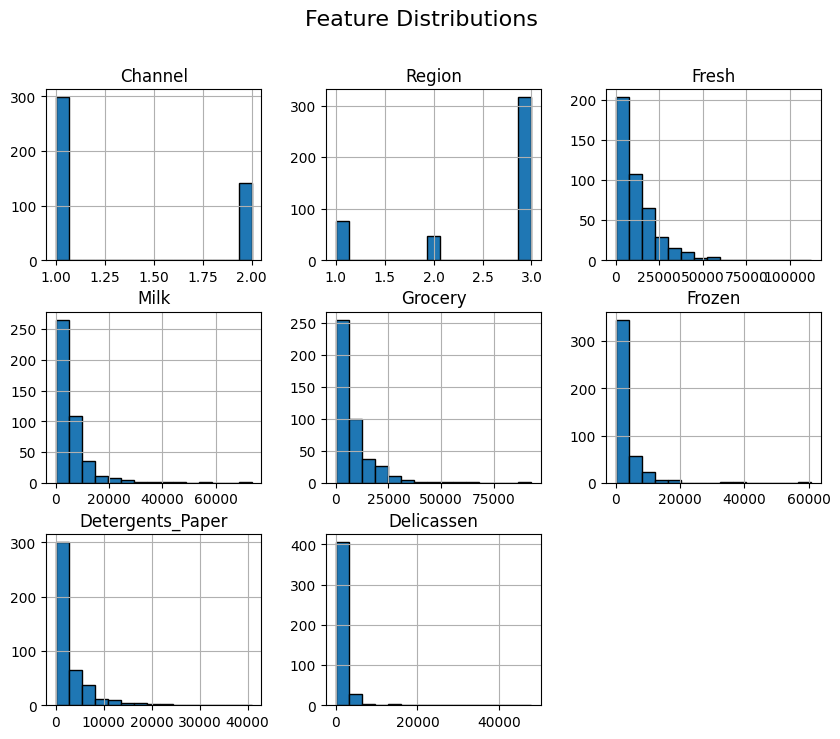

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize feature distributions
data.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [ ]:
# Select relevant features
X = data.iloc[:, 2:]  # Exclude first two columns (Region, Channel) if present

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print("Shape of the dataset:", X_scaled.shape)


Shape of the dataset: (440, 6)


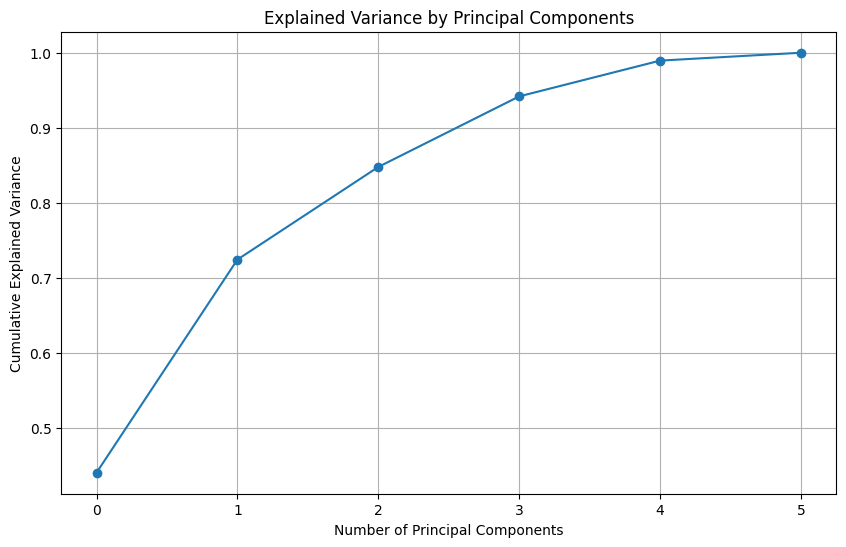

Explained Variance Ratio: [0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]


In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [ ]:
# Retain 95% of the variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("Number of components explaining 95% variance:", pca_95.n_components_)


Number of components explaining 95% variance: 5


<ipython-input-8-90217861cff0>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, cmap='viridis')


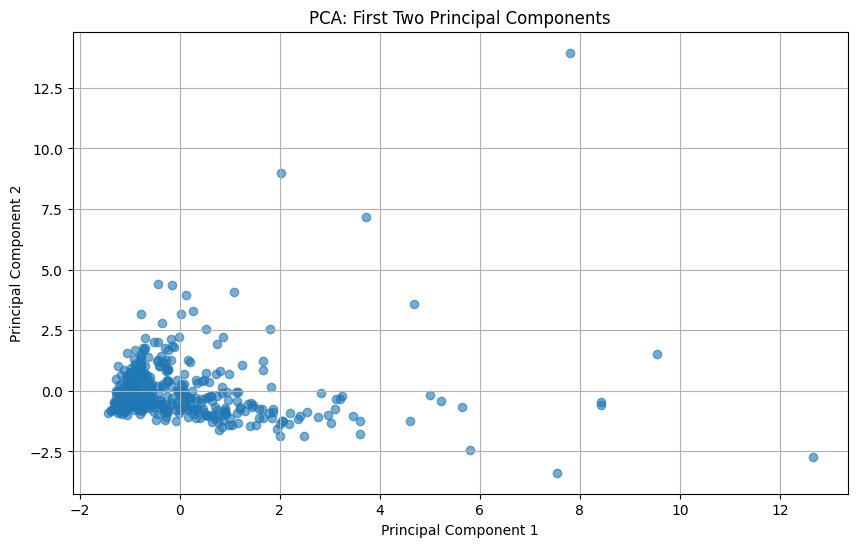

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, cmap='viridis')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


                       PC1       PC2       PC3       PC4       PC5       PC6
Fresh             0.042884  0.527932  0.812257 -0.236686 -0.048683 -0.036025
Milk              0.545118  0.083168 -0.060388 -0.087190  0.826579 -0.038040
Grocery           0.579256 -0.146088  0.108384  0.105987 -0.314999  0.721745
Frozen            0.051189  0.611278 -0.178386  0.768683 -0.027932 -0.015637
Detergents_Paper  0.548640 -0.255233  0.136192  0.171744 -0.339640 -0.685894
Delicassen        0.248682  0.504207 -0.523904 -0.552065 -0.314701 -0.075134


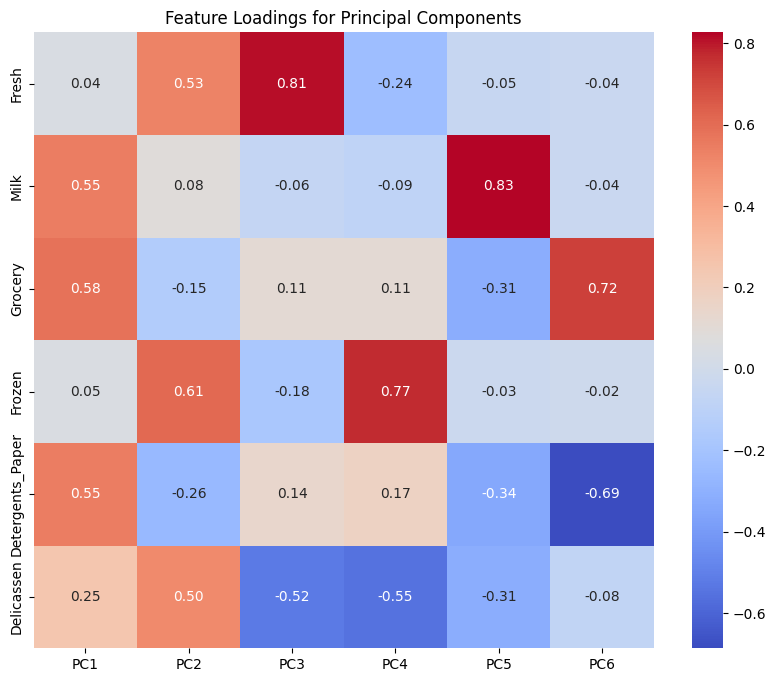

In [ ]:
# Component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(X.shape[1])],
    index=X.columns
)
print(loadings)

# Heatmap of loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Loadings for Principal Components")
plt.show()


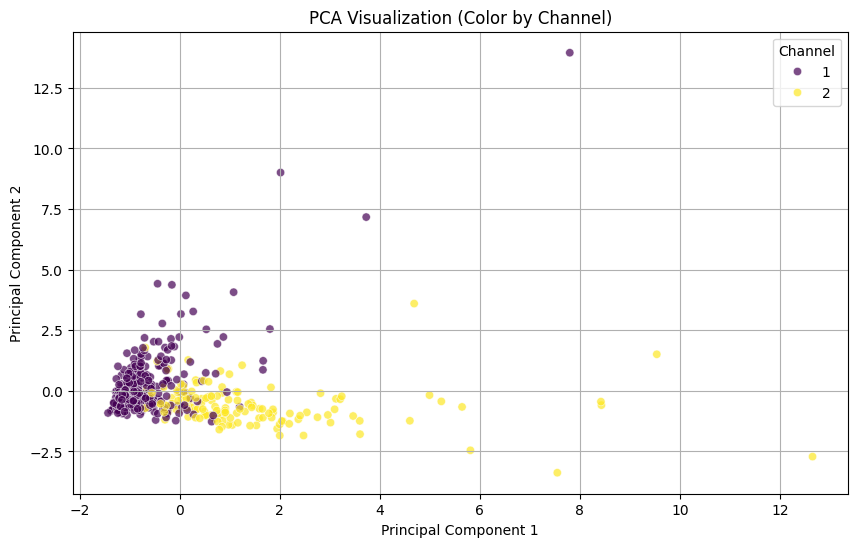

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Channel'], palette='viridis', alpha=0.7)
plt.title("PCA Visualization (Color by Channel)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Channel")
plt.grid()
plt.show()


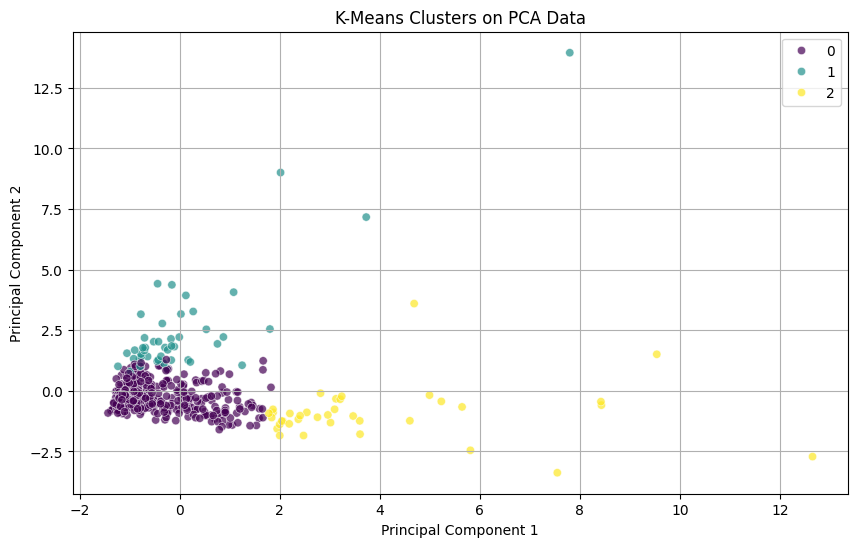

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means to PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca_95)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title("K-Means Clusters on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca_95, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.47
